In [117]:
import pandas as pd

In [118]:
path = './student_performance.csv'
df = pd.read_csv(path)

In [119]:
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


In [120]:
df.shape

(10, 9)

In [121]:
df.columns

Index(['StudentID', 'Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade'],
      dtype='object')

In [122]:
df.isnull().sum()

StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
dtype: int64

Let's do some encoding here

In [123]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,1,85,15,78,1,High,80
1,2,Sarah,0,90,20,85,2,Medium,87
2,3,Alex,1,78,10,65,0,Low,68
3,4,Michael,1,92,25,90,3,High,92
4,5,Emma,0,88,18,82,2,Medium,85


In [124]:
df = pd.get_dummies(df, columns=['ParentalSupport'], drop_first=False)
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,ParentalSupport_High,ParentalSupport_Low,ParentalSupport_Medium
0,1,John,1,85,15,78,1,80,True,False,False
1,2,Sarah,0,90,20,85,2,87,False,False,True
2,3,Alex,1,78,10,65,0,68,False,True,False
3,4,Michael,1,92,25,90,3,92,True,False,False
4,5,Emma,0,88,18,82,2,85,False,False,True


Visualization

Text(0.5, 1.0, 'Attendance Rate vs Final Grade')

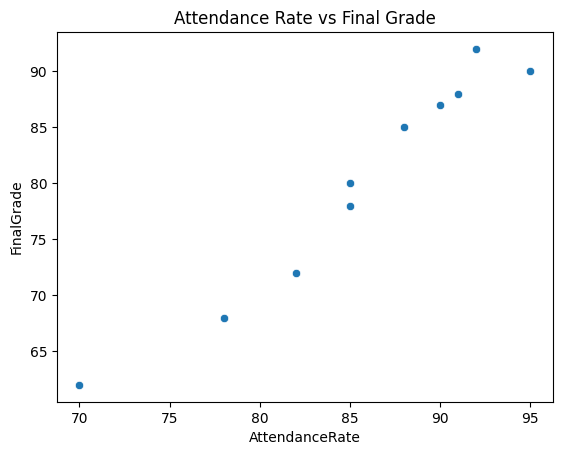

In [125]:
import seaborn as sns

sns.scatterplot(x=df['AttendanceRate'], y=df['FinalGrade']).set_title(f'Attendance Rate vs Final Grade')
    


Text(0.5, 1.0, 'Study Hours Per Week vs Final Grade')

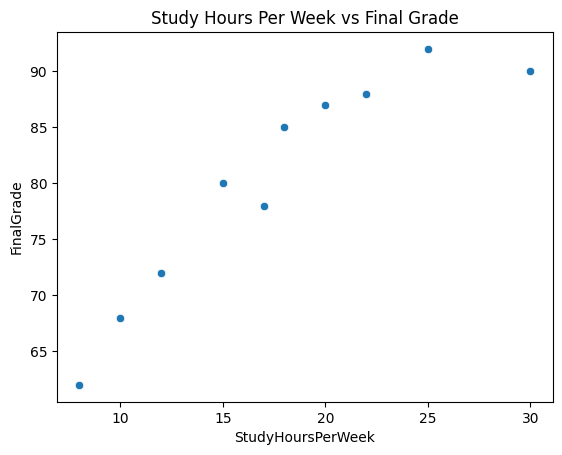

In [126]:
import seaborn as sns

sns.scatterplot(x=df['StudyHoursPerWeek'], y=df['FinalGrade']).set_title(f'Study Hours Per Week vs Final Grade')

Text(0.5, 1.0, 'Attendance Rate vs Final Grade')

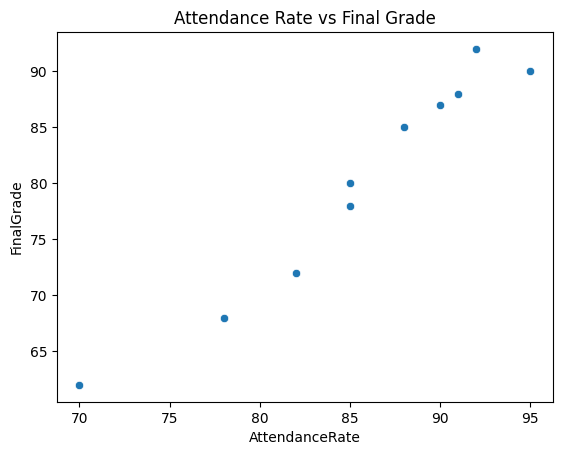

In [127]:
import seaborn as sns

sns.scatterplot(x=df['AttendanceRate'], y=df['FinalGrade']).set_title(f'Attendance Rate vs Final Grade')

Any correlation?

<Axes: >

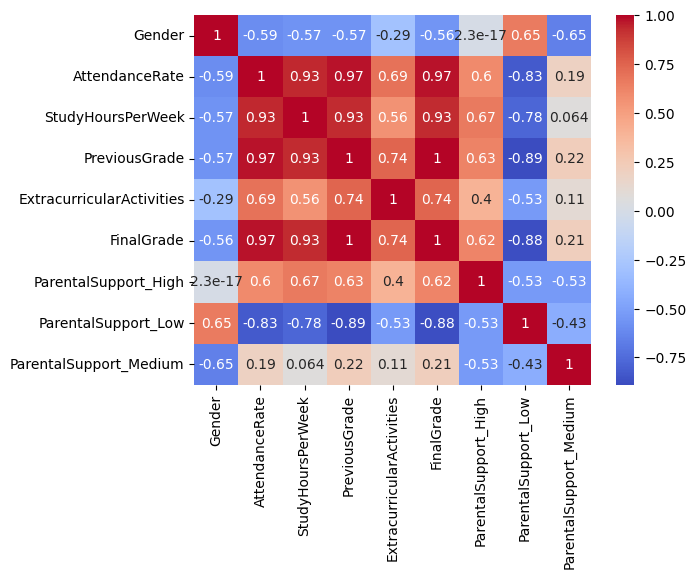

In [128]:
df_correlation = df.drop(['StudentID', 'Name'], axis=1)
correlation_matrix = df_correlation.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Scaling

In [129]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
df[['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'FinalGrade']] = scaler.fit_transform(df[['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'FinalGrade']])
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,ParentalSupport_High,ParentalSupport_Low,ParentalSupport_Medium
0,1,John,1,0.60,0.318182,0.600000,1,0.600000,True,False,False
1,2,Sarah,0,0.80,0.545455,0.833333,2,0.833333,False,False,True
2,3,Alex,1,0.32,0.090909,0.166667,0,0.200000,False,True,False
3,4,Michael,1,0.88,0.772727,1.000000,3,1.000000,True,False,False
4,5,Emma,0,0.72,0.454545,0.733333,2,0.766667,False,False,True


Parental Support is categorical, lets change to numeric values

I could've used onehotencoder or ordinal encoder, so let's try those later

In [130]:
df[['ParentalSupport_High', 'ParentalSupport_Low', 'ParentalSupport_Medium']] = df[['ParentalSupport_High', 'ParentalSupport_Low', 'ParentalSupport_Medium']].astype(int)
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,ParentalSupport_High,ParentalSupport_Low,ParentalSupport_Medium
0,1,John,1,0.60,0.318182,0.600000,1,0.600000,1,0,0
1,2,Sarah,0,0.80,0.545455,0.833333,2,0.833333,0,0,1
2,3,Alex,1,0.32,0.090909,0.166667,0,0.200000,0,1,0
3,4,Michael,1,0.88,0.772727,1.000000,3,1.000000,1,0,0
4,5,Emma,0,0.72,0.454545,0.733333,2,0.766667,0,0,1


In [131]:
from sklearn.model_selection import train_test_split


X = df.drop(['StudentID', 'Name', 'FinalGrade'], axis=1)
y = df['FinalGrade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print(f'mse = {mse}')
print(f'r2 = {r2}')


mse = 0.005142285447043228
r2 = 0.9177234328473084


In [133]:
from sklearn.ensemble import RandomForestRegressor


model2 = RandomForestRegressor()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
r2_2 = model2.score(X_test, y_test)
mse2 = mean_squared_error(y_test, y_pred)

print(f'mse = {mse2}')
print(f'r2 = {r2_2}')

mse = 0.005142285447043228
r2 = 0.9684044444444438


In [134]:
from sklearn.ensemble import GradientBoostingRegressor


model3 = GradientBoostingRegressor()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
r2_3 = model3.score(X_test, y_test)
mse3 = mean_squared_error(y_test, y_pred)

print(f'mse = {mse3}')
print(f'r2 = {r2_3}')

mse = 0.005142285447043228
r2 = 0.9815046125949534
